#Predicting Breast Cancer
Building a "Random Forest Classifier" to predict malignant tumors in breast tissue.


In [59]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [60]:
from sklearn.ensemble import RandomForestClassifier

# The error metric. In this case, we will use c-stat 
from sklearn.metrics import roc_auc_score

# An efficient data structure. 
import pandas as pd

# Import the data
X = pd.read_csv("breast_cancer.csv")
y = X.pop("malignant")

In [61]:
X.describe()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,349.000000,1071704.098712,4.417740,3.134478,3.207439,2.806867,3.216023,3.440629,3.437768,2.866953,1.589413
std,201.928205,617095.729819,2.815741,3.051459,2.971913,2.855379,2.214300,3.665507,2.438364,3.053634,1.715078
min,0.000000,61634.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,174.500000,870688.500000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,349.000000,1171710.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,523.500000,1238298.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,698.000000,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [62]:
X.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0,1000025,5,1,1,1,2,1,3,1,1
1,1,1002945,5,4,4,5,7,10,3,2,1
2,2,1015425,3,1,1,1,2,2,3,1,1
3,3,1016277,6,8,8,1,3,4,3,7,1
4,4,1017023,4,1,1,3,2,1,3,1,1


In [63]:
# Dropping the variables 
X.drop(["Unnamed: 0", "id number"], axis=1, inplace=True)

In [64]:
# Considering uniformity_of_cell_shape and uniformity_of_cell_size as categorical variables.
categorical_variables = ['uniformity_of_cell_shape', 'uniformity_of_cell_size']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [65]:
# Make train and test datasets
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

##Model Creation
Using train to train my model and test to see how accurate the model is.

In [66]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)

roc = roc_auc_score(y_test, model.predict(X_test))
print "C-stat: ", roc

C-stat:  0.942857142857


This is a pretty good model. Since we are dealing with predicting cancer we must built as good model as possible. So, it is better to try some different parameters for the model.

###Parameter tests
* ####Parameters to test are:
    * <b>n_estimators</b>: The number of trees in the forest.
    * <b>max_features</b>: The number of features to consider when looking for the best split.
    * <b>min_samples_leaf</b>: The minimum number of samples in newly created leaves.
    * <b>n_jobs</b>: Determines if multiple processors should be used to train and test the model.

### n_jobs

In [67]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X_train, y_train)

1 loops, best of 3: 834 ms per loop


In [68]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

1 loops, best of 3: 959 ms per loop


So, if we set n_jobs=1 as model takes less time per loop than n_job=-1. 

### n_estimators

30 trees
C-stat:  0.95

50 trees
C-stat:  0.95

100 trees
C-stat:  0.942857142857

200 trees
C-stat:  0.95

500 trees
C-stat:  0.95

1000 trees
C-stat:  0.95

2000 trees
C-stat:  0.95



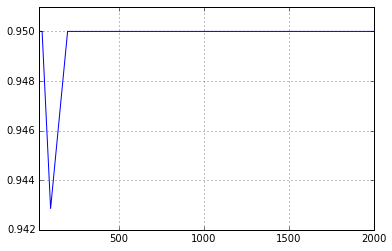

In [69]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=1, random_state=42)
    model.fit(X_train, y_train)
    print trees, "trees"
    roc = roc_auc_score(y_test, model.predict(X_test))
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

Choosing n_estimater>200. Let's consider n_estimater=1000

### max_features

auto option
C-stat:  0.95

None option
C-stat:  0.942857142857

sqrt option
C-stat:  0.95

log2 option
C-stat:  0.95

0.9 option
C-stat:  0.942857142857

0.2 option
C-stat:  0.95



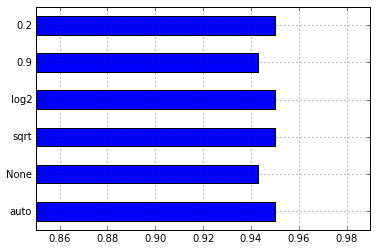

In [70]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=1, random_state=42, max_features=max_features)
    model.fit(X_train, y_train)
    print max_features, "option"
    roc = roc_auc_score(y_test, model.predict(X_test))
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.99));

It is better to choose max_features="auto" as the C-stat is high.

### min_samples_leaf

1 min samples
C-stat:  0.95

2 min samples
C-stat:  0.957142857143

3 min samples
C-stat:  0.964285714286

4 min samples
C-stat:  0.964285714286

5 min samples
C-stat:  0.964285714286

6 min samples
C-stat:  0.964285714286

7 min samples
C-stat:  0.964285714286

8 min samples
C-stat:  0.964285714286

9 min samples
C-stat:  0.957142857143

10 min samples
C-stat:  0.957142857143



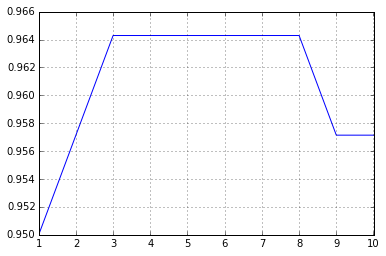

In [71]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    print min_samples, "min samples"
    roc = roc_auc_score(y_test, model.predict(X_test))
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

We can observe that after min_samples_leaf>2 remains high till min_samples_leaf=8. so as a rule of thumb we can choose min_samples_leaf=5.

##Final model

In [72]:
model = RandomForestClassifier(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X_train, y_train)
roc = roc_auc_score(y_test, model.predict(X_test)).round(2)
print "C-stat: ", roc

C-stat:  0.96


### Model Comparison

* Our final model is better than our first model. So, we are 96% successful in predicting malignant tumor.

* Classification report gives Precision and Recall details.
    * Precision is the fraction of correctly identified examples of a class (ratio of true positives to all positives).
    * Recall is the fraction of observations classified in that class that was correctly classified.
    * Where high precision relates to a 'low false positive rate', and high recall relates to a 'low false negative rate'.
    * High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

In [73]:
from sklearn.metrics import classification_report
print classification_report(model.predict(X_test), y_test)

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       100
          1       0.99      0.92      0.95        75

avg / total       0.96      0.96      0.96       175



####Classificatio Report:(Interpretation)
* From Classification report we can observe that Precition and Recall rates are high(0.96). So, we can say that our model has very low false positive rate and false negative rate. 
* That is, our model 4% of times falsely predict breast cancer and 4% of the times may miss a malignant case.

<B>Following ROC curve is created by plotting the true positive rate against the false positive rate.</B>
* A better metric for binary classifer comparisons is AUC or area under the ROC curve(C-stat). More the AUC better the model.
* ROC curve, is a graphical plot that illustrates the performance of a binary classifier system (i.e Random forest classifier).

In [74]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

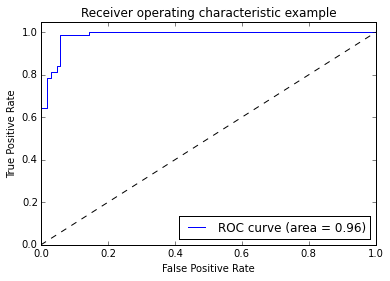

In [75]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Variable importance measures

In [76]:
model.feature_importances_

array([  8.10324738e-02,   7.87837396e-02,   1.03683379e-01,
         2.06613593e-01,   1.39591911e-01,   1.51332634e-01,
         1.60953633e-02,   5.74805989e-02,   7.16828439e-03,
         1.13189793e-03,   2.28949320e-03,   1.64952399e-03,
         2.23823328e-03,   7.02570854e-04,   1.85136680e-03,
         0.00000000e+00,   6.55138368e-03,   1.16618931e-01,
         5.25545181e-03,   1.95625500e-03,   2.80196703e-03,
         1.48363443e-03,   1.67843815e-03,   1.75666362e-04,
         1.16890149e-03,   0.00000000e+00,   1.06643080e-02])

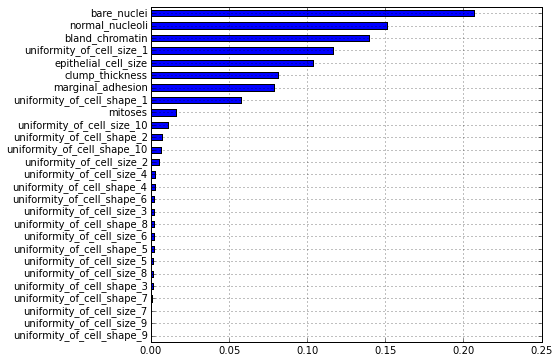

In [77]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

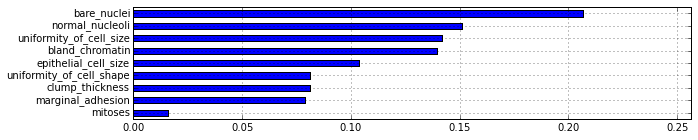

In [78]:
# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

###Bar chart indicates the importance of the variables in descending order:
* <B>Bare nuclei, normal nucleoli and bland chromatin</B> are signs of benignity. So, they have more importance in determining if a tumor is malignant or benign.
* <B>Uniformity of the cell size / shape:</B> Cancer cells tend to vary in size and shape. That is why these parameters are valuable in determining whether the cells are cancerous or not.
* <B>Epithelial cell size:</B> Epithelial cell that are significantly enlarge may be a malignant cell. So, size of the cell matters. 
* <B>Clump thickness:</B>  Benign cells are tend to be grouped in monolayers. While cancerous cells are often grouped in multilayers. Therefore clump thickness is one of the important variable
* <B>Marginal adhesion:</B> Normal cells tend to stick together. Cancer cells tend to lose this ability. So, less adhesion is a sign of malignancy.
* <B>Mitoses:</B> The mitotic activity (how much the tumor cells are dividing) or Mitotic count is an important parameter for the prognosis of breast cancer. However, it is difficult to detect mitosis and make an accurate prognosis. So, it has little less importance than other parameters.